# Ajustar um Modelo de Regressão Linear aos dados apresentados

Ajustar um Modelo de Regressão Linear aos dados apresentados:

- Coluna 1 - índice

- Coluna 2 - Entrada

- Coluna 3 - Saída

Entregar o código/parâmetros de regressão do modelo.

arquivo: treino_sinais_vitais_qPA_versus_Gravidade.csv

# Aluno: Diego Soares Galdino


### Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Lendo o arquivo csv e definindo as colunas

In [2]:
# Ler o arquivo CSV sem cabeçalho
df = pd.read_csv('treino_sinais_vitais_qPA_versus_Gravidade.csv', header=None)
df.columns = ['index', 'entrada', 'saída']

### Análise exploratória Inicial

In [10]:
# Visualizar as primeiras linhas do dataframe
print(df.head())
print("\n")
# Verificar informações estatísticas dos dados
print(df.describe().T)

   index   entrada      saída
0      1  8.416754  40.000000
1      2  8.725890  41.530427
2      3  0.000000  52.730745
3      4  8.733333  34.679911
4      5  1.747626  69.375882


          count        mean         std        min         25%         50%  \
index    1500.0  750.500000  433.157015   1.000000  375.750000  750.500000   
entrada  1500.0    2.414994    5.128025  -8.732919   -0.861911    4.237224   
saída    1500.0   41.427388   16.590523  13.222719   27.873461   40.000000   

                 75%          max  
index    1125.250000  1500.000000  
entrada     6.764517     8.733333  
saída      51.958481    87.000000  


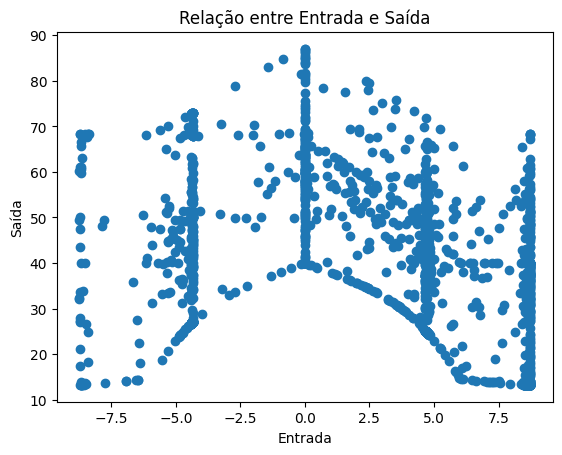

In [4]:
# Plotar scatter plot da relação entre entrada e saída
plt.scatter(df['entrada'], df['saída'])
plt.xlabel('Entrada')
plt.ylabel('Saída')
plt.title('Relação entre Entrada e Saída')
plt.show()

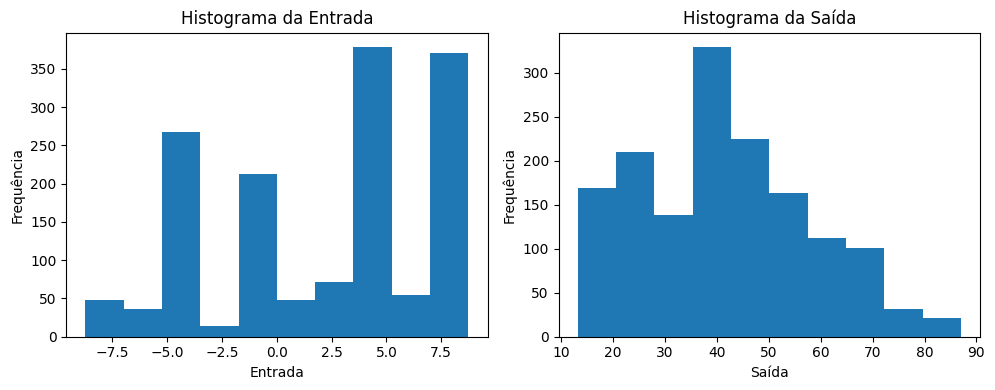

In [5]:
# Criar figura e eixos para os subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plotar histograma da coluna "entrada"
axs[0].hist(df['entrada'], bins=10)
axs[0].set_xlabel('Entrada')
axs[0].set_ylabel('Frequência')
axs[0].set_title('Histograma da Entrada')

# Plotar histograma da coluna "saída"
axs[1].hist(df['saída'], bins=10)
axs[1].set_xlabel('Saída')
axs[1].set_ylabel('Frequência')
axs[1].set_title('Histograma da Saída')

# Ajustar espaçamento entre subplots
plt.tight_layout()

# Exibir os subplots
plt.show()

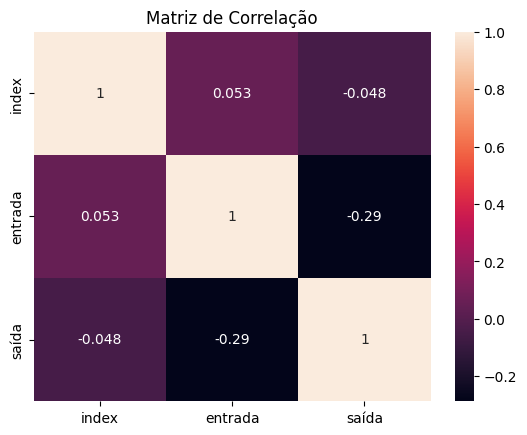

In [6]:
# Calcular e visualizar a matriz de correlação
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matriz de Correlação')
plt.show()

### Regressão Linear

In [7]:
# Extrair as colunas de entrada e saída
entrada = df['entrada'].values.reshape(-1, 1)
saida = df['saída'].values

# Criar um objeto de regressão linear
regressao = LinearRegression()

# Ajustar o modelo aos dados
regressao.fit(entrada, saida)

# Parâmetros da regressão
coeficiente_angular = regressao.coef_
intercepto = regressao.intercept_

print("Coeficiente Angular:", coeficiente_angular)
print("Intercepto:", intercepto)

Coeficiente Angular: [-0.92950325]
Intercepto: 43.67213247211407


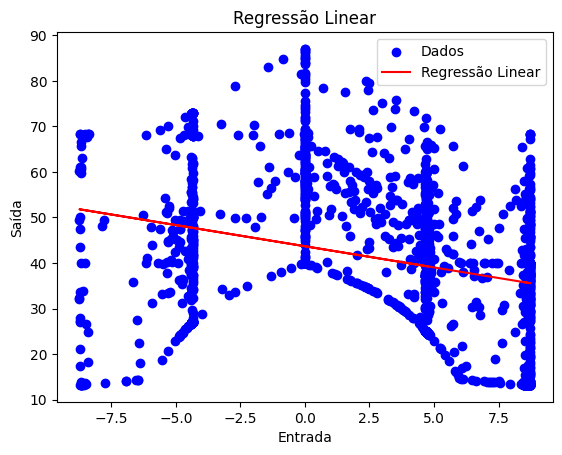

In [8]:
# Plotar os dados com a linha de regressão
plt.scatter(entrada, saida, color='blue', label='Dados')
plt.plot(entrada, regressao.predict(entrada), color='red', label='Regressão Linear')
plt.xlabel('Entrada')
plt.ylabel('Saída')
plt.legend()
plt.title('Regressão Linear')
plt.show()